In [84]:
import pandas
import numpy as np
from numpy import *  
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import matplotlib.pyplot as plt  


In [85]:
def loadData(loadfile, stance):  
    train_x = []  
    train_y = []  
    fileIn = pandas.read_csv(loadfile)  
    if stance != 'unrelated':
        fileIn = fileIn[fileIn['Stance'] != 'unrelated']
    x0 = np.ones(len(fileIn))
    train_x = np.array([x0, fileIn['cos_sim'], fileIn['euclidean_dist']]).T
    train_y = fileIn['Stance'].values == stance
    return train_x, train_y

In [86]:
def predict(B, X):
    return X.dot(B)

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

def gradient_descent(X, Y, B, alpha, iterations):
    ySize = len(Y)
   
    for i in range(iterations):
        output = X.dot(B)
        loss = output - Y
        gradient = X.T.dot(loss) / ySize       
        B = B - alpha * gradient
        cost = cost_function(X, Y, B)
        
    print('iterations:', iterations, 'cost:', cost)     
    return B

In [87]:
min_max_scaler = preprocessing.MinMaxScaler()

# train_x_unrelated, train_y_unrelated = loadData('fnc-1/split/train_stances_sim.csv', 'unrelated')
# train_x_agree, train_y_agree = loadData('fnc-1/split/train_stances_sim.csv', 'agree') 
# train_x_disagree, train_y_disagree = loadData('fnc-1/split/train_stances_sim.csv', 'disagree')
# train_x_discuss, train_y_discuss = loadData('fnc-1/split/train_stances_sim.csv', 'discuss')
train_x_unrelated, train_y_unrelated = loadData('fnc-1/split/train_stances_hand_features.csv', 'unrelated')
train_x_agree, train_y_agree = loadData('fnc-1/split/train_stances_hand_features.csv', 'agree') 
train_x_disagree, train_y_disagree = loadData('fnc-1/split/train_stances_hand_features.csv', 'disagree')
train_x_discuss, train_y_discuss = loadData('fnc-1/split/train_stances_hand_features.csv', 'discuss')

B = np.array([0, 0, 0])
alpha = 0.02
train_x_unrelated = min_max_scaler.fit_transform(train_x_unrelated)
train_x_agree = min_max_scaler.fit_transform(train_x_agree)
train_x_disagree = min_max_scaler.fit_transform(train_x_disagree)
train_x_discuss = min_max_scaler.fit_transform(train_x_discuss)

B_unrelated = gradient_descent(train_x_unrelated, train_y_unrelated, B, alpha, 3000)
B_agree = gradient_descent(train_x_agree, train_y_agree, B, alpha, 3000)
B_disagree = gradient_descent(train_x_disagree, train_y_disagree, B, alpha, 3000)
B_discuss = gradient_descent(train_x_discuss, train_y_discuss, B, alpha, 3000)


iterations: 3000 cost: 0.08262190392804007
iterations: 3000 cost: 0.0983516357477334
iterations: 3000 cost: 0.029294184663666345
iterations: 3000 cost: 0.13155132334518493


In [88]:
print('x_shape',train_x_unrelated.shape)
print('y_shape',train_y_unrelated.shape)

x_shape (44974, 3)
y_shape (44974,)


In [89]:
# validation_data = pandas.read_csv('fnc-1/split/validation_stances_sim.csv')
validation_data = pandas.read_csv('fnc-1/split/validation_stances_hand_features.csv')

x0 = np.ones(len(validation_data))
validation_x = np.array([x0, validation_data['cos_sim'], validation_data['word_count']]).T
validation_x = min_max_scaler.fit_transform(validation_x)

validation_predict_unrelated = predict(B_unrelated, validation_x)
validation_predict_agree = predict(B_agree, validation_x)
validation_predict_disagree = predict(B_disagree, validation_x)
validation_predict_discuss = predict(B_discuss, validation_x)

result = np.vstack((validation_predict_unrelated, validation_predict_agree, 
                    validation_predict_disagree, validation_predict_discuss)).T

# print(result)
result = result.argmax(1)
result_stance = []

for i in range(len(result)):
    if result[i] == 0:
        result_stance.append('unrelated')
    elif result[i] == 1:
        result_stance.append('agree')
    elif result[i] == 2:
        result_stance.append('disagree')
    else:
        result_stance.append('discuss')
# print(result_stance)
print('test accuracy:', sum(result_stance == validation_data['Stance'])/ len(result_stance))

test accuracy: 0.8541416566626651


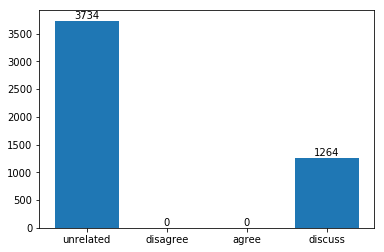

In [90]:
result_sum = []
result_sum.append(sum(np.array(result_stance) == 'unrelated'))
result_sum.append(sum(np.array(result_stance) == 'agree'))
result_sum.append(sum(np.array(result_stance) == 'disagree'))
result_sum.append(sum(np.array(result_stance) == 'discuss'))
plt.bar(['unrelated', 'disagree', 'agree', 'discuss'], result_sum)
for a,b in zip(['unrelated', 'disagree', 'agree', 'discuss'],result_sum):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)
plt.show()  

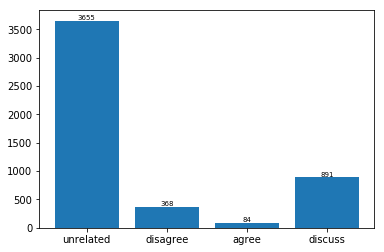

In [20]:
validataion_sum = []
validataion_sum.append(sum(validation_data['Stance'] == 'unrelated'))
validataion_sum.append(sum(validation_data['Stance'] == 'agree'))
validataion_sum.append(sum(validation_data['Stance'] == 'disagree'))
validataion_sum.append(sum(validation_data['Stance'] == 'discuss'))
plt.bar(['unrelated', 'disagree', 'agree', 'discuss'], validataion_sum)  
for a,b in zip(['unrelated', 'disagree', 'agree', 'discuss'],validataion_sum):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)

plt.show()  
